In [2]:
import sklearn
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
data = pd.read_csv("C:\\Users\\YASH\\Desktop\\Data Science\\iris.csv")

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data_points = data.iloc[:, :4]
labels = data.iloc[:,4:5]
print(data_points)
print(labels)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
       variety
0       Setosa
1       Setosa
2       Setosa
3       Setosa
4       Setosa
..         ...
145  Virginica
146  Virginica
147  Virginica
148  Virginica
149  Virginica

[150 rows x 1 columns]


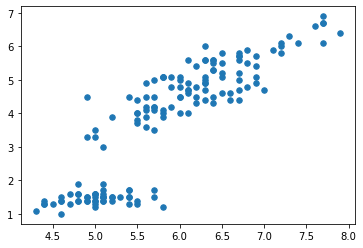

In [5]:
plt.scatter(data["sepal.length"],data["petal.length"],s=30)
plt.show()

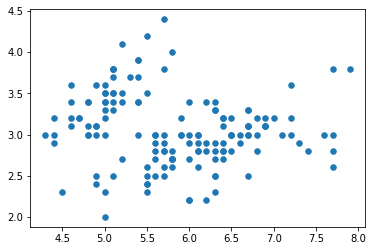

In [6]:
plt.scatter(data["sepal.length"],data["sepal.width"],s=30)
plt.show()

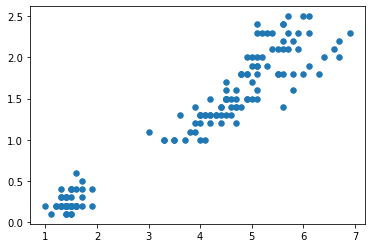

In [7]:
plt.scatter(data["petal.length"],data["petal.width"],s=30)
plt.show()

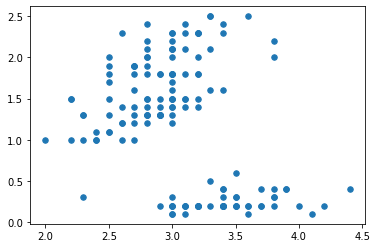

In [8]:
plt.scatter(data["sepal.width"],data["petal.width"],s=30)
plt.show()

In [9]:
correlations = data.corr()

<AxesSubplot:>

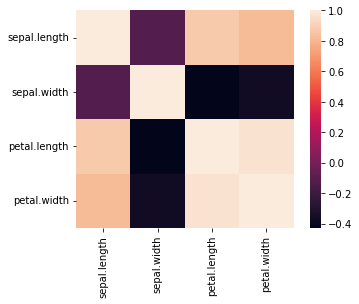

In [10]:
sns.heatmap(data=correlations,square=True)

In [11]:
correlations

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:xlabel='sepal.width'>

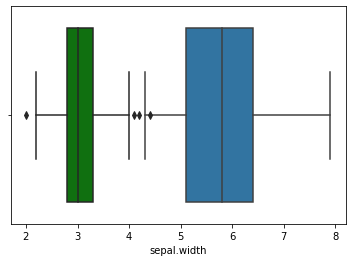

In [12]:
sns.boxplot(x=data["sepal.length"])
sns.boxplot(x=data["sepal.width"],color='green')

<AxesSubplot:xlabel='petal.width'>

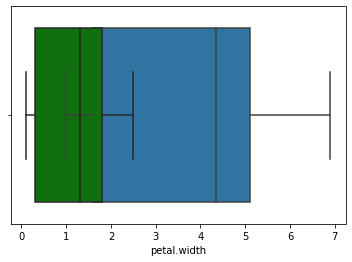

In [29]:
sns.boxplot(x=data["petal.length"])
sns.boxplot(x=data["petal.width"],color='green')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [14]:
x_train,x_test,y_train,y_test = train_test_split(data_points,labels,test_size=0.2,random_state=0)
print(x_train.shape)

(120, 4)


In [15]:
sklearn_pca = PCA(n_components = 0.95)
sklearn_pca.fit(x_train)

PCA(n_components=0.95)

In [16]:
x_train_transformed = sklearn_pca.transform(x_train)
print(x_train_transformed.shape)

(120, 2)


In [17]:
print(x_test.shape)

(30, 4)


In [18]:
x_test_transformed = sklearn_pca.transform(x_test)
print(x_test_transformed.shape)

(30, 2)


In [19]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
model.fit(x_train_transformed,y_train.values.ravel())

LogisticRegression()

In [21]:
y_predict = model.predict(x_test_transformed)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy = accuracy_score(y_predict,y_test)
print(accuracy)

1.0


In [24]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=8)

In [25]:
y_pred = classifier.predict(x_test)

In [26]:
accuracy = accuracy_score(y_pred,y_test)
print(accuracy)

1.0
